In [1]:
import pandas as pd

In [2]:
OriginalData = pd.read_csv('./Data/housing.csv')

In [3]:
OriginalData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
OriginalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
OriginalData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
OriginalData['ocean_proximity'].value_counts().sort_values(ascending=False)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

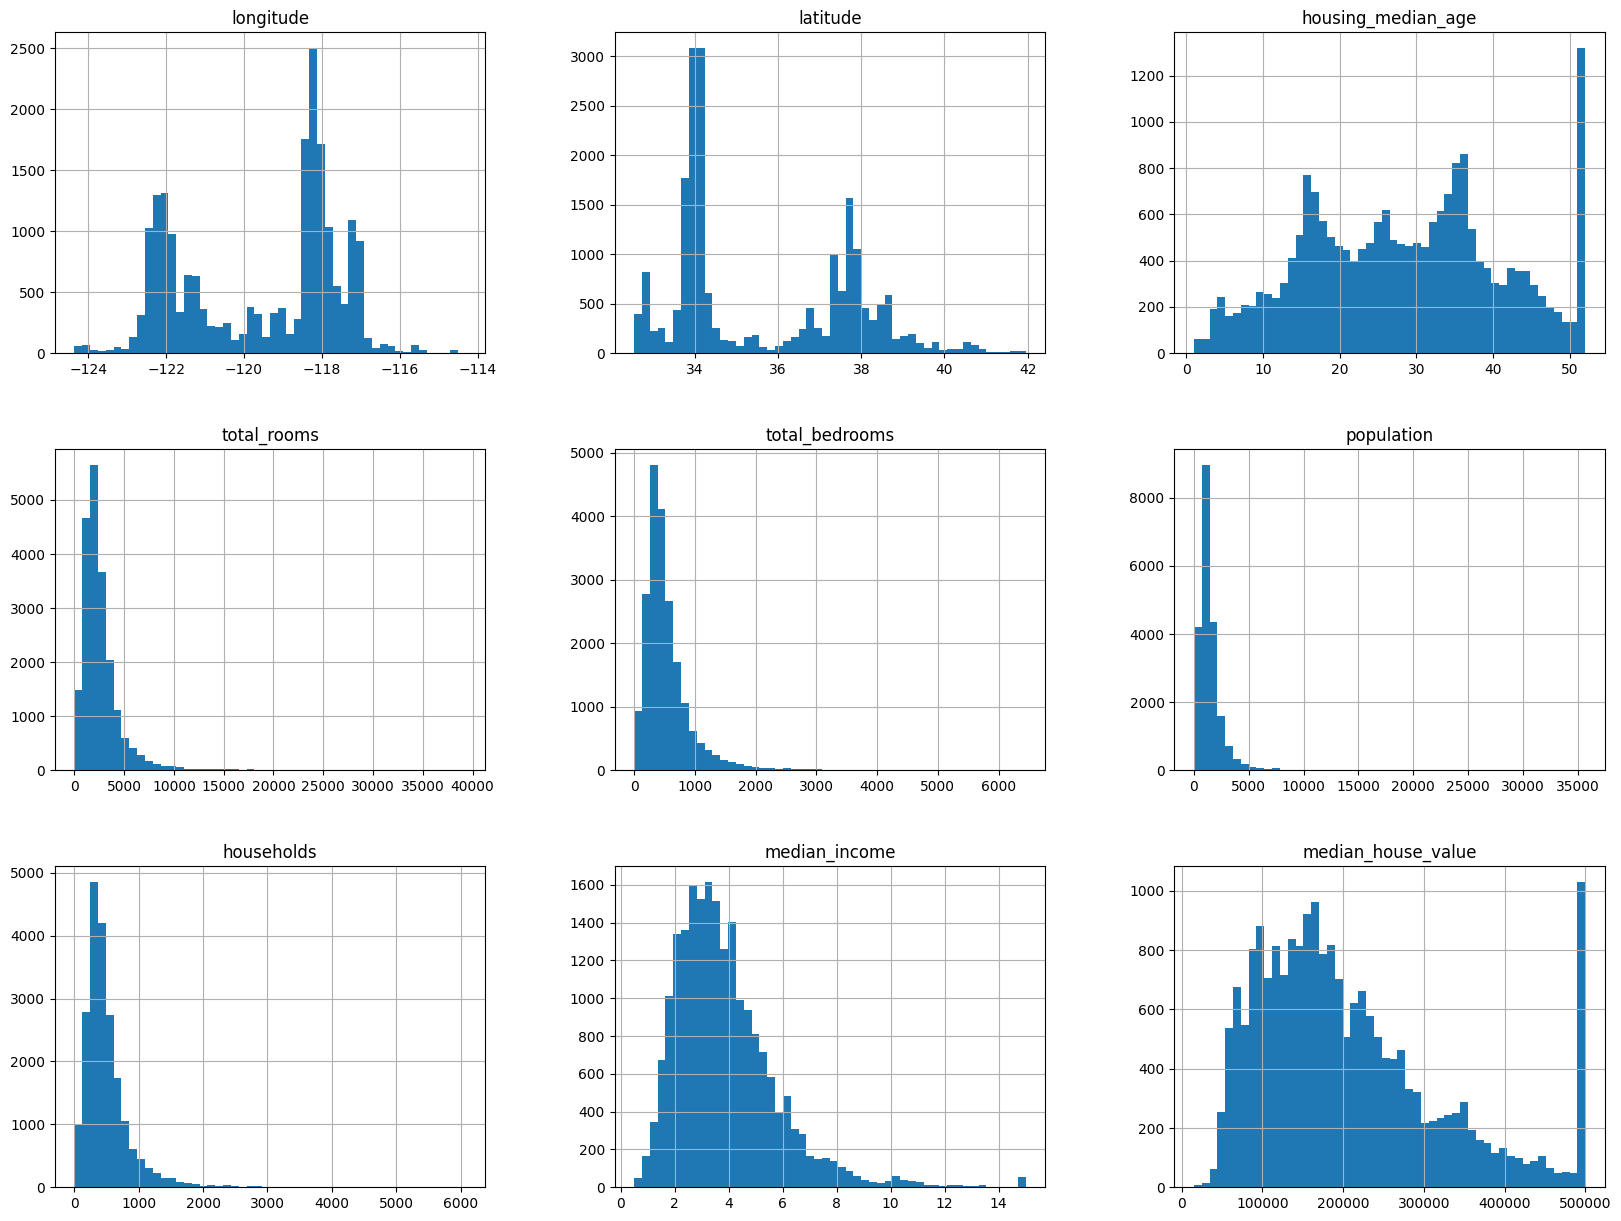

In [7]:
import matplotlib.pyplot as plt
OriginalData.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
ocean_proximity = OriginalData['ocean_proximity']
OriginalData = OriginalData.drop('ocean_proximity',axis=1)

In [9]:
corr_matrix = OriginalData.corr()

In [10]:
corr_matrix['median_income'].sort_values(ascending=False)

median_income         1.000000
median_house_value    0.688075
total_rooms           0.198050
households            0.013033
population            0.004834
total_bedrooms       -0.007723
longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
Name: median_income, dtype: float64

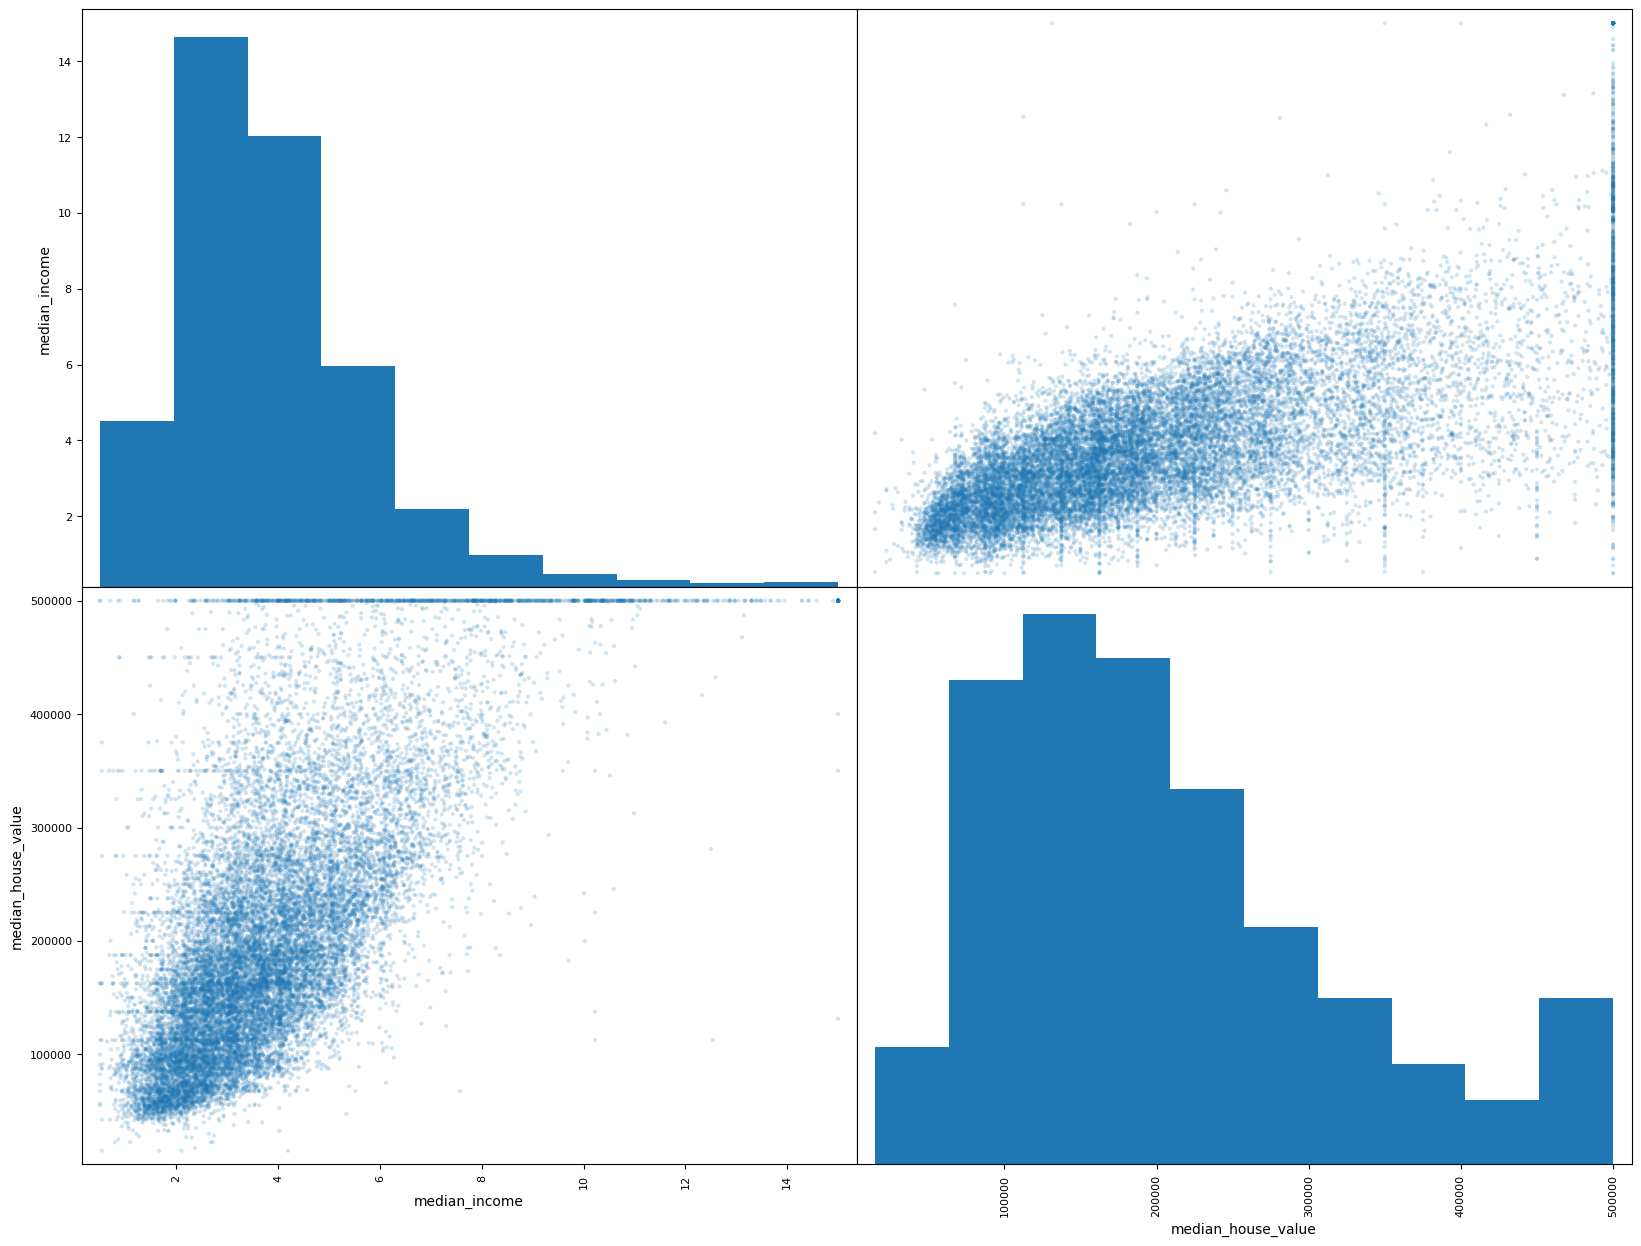

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(OriginalData[['median_income','median_house_value']],figsize=(20,15),alpha=0.2)
plt.show()

In [12]:
import numpy as np
OriginalData['income_cat'] = pd.cut(OriginalData['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

In [13]:
OriginalData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [14]:
OriginalData['income_cat'].value_counts().sort_values(ascending=False)

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [15]:
OriginalData['ocean_proximity'] = ocean_proximity

In [16]:
from sklearn.model_selection import train_test_split
train_Set,test_set = train_test_split(OriginalData,test_size=0.2,stratify=OriginalData['income_cat'],random_state=42)

In [17]:
(len(train_Set)/len(OriginalData))

0.8

In [18]:
(len(test_set)/len(OriginalData))

0.2

<Axes: xlabel='longitude', ylabel='latitude'>

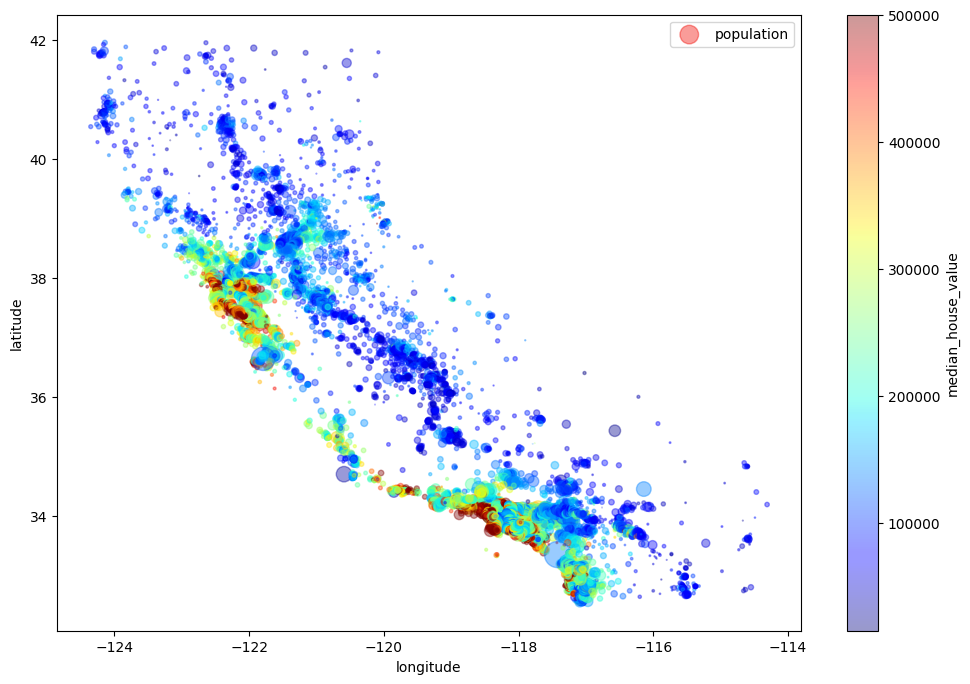

In [19]:
OriginalData.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=OriginalData['population']/100,label='population',figsize=(12,8),c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True)

<Axes: xlabel='longitude', ylabel='latitude'>

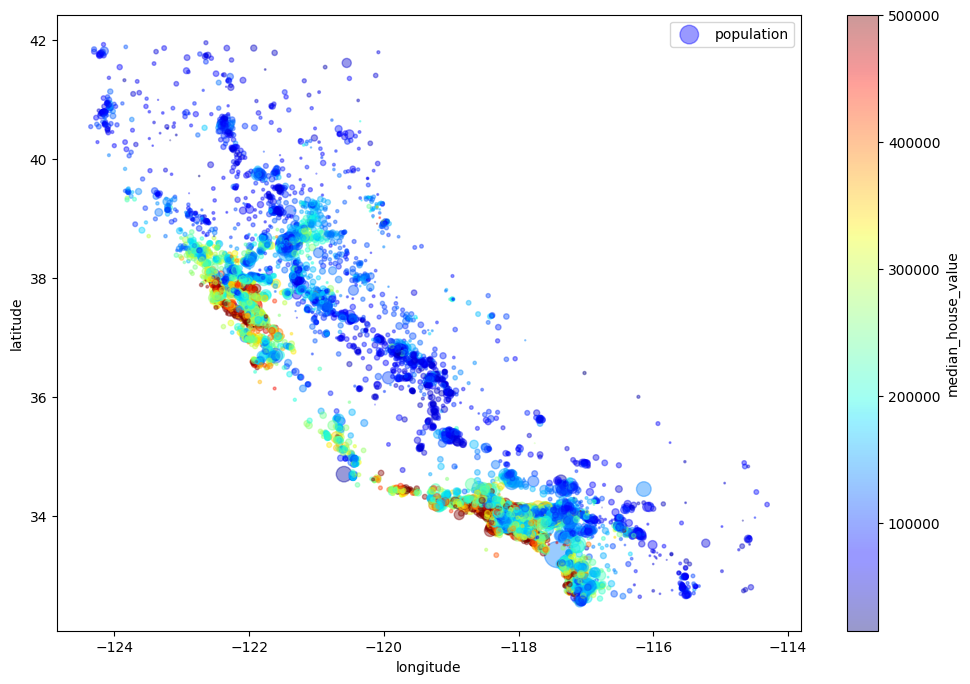

In [20]:
train_Set.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=train_Set['population']/100,label='population',figsize=(12,8),c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True)

In [21]:
Y_train = train_Set['median_house_value']
X_train = train_Set.drop('median_house_value',axis=1)
Y_test = test_set['median_house_value']
X_test = test_set.drop('median_house_value',axis=1)

In [22]:
X_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
income_cat              0
ocean_proximity         0
dtype: int64

In [23]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
ocean_encoded = encoder.fit_transform(X_train[['ocean_proximity']])
ocean_df = pd.DataFrame(ocean_encoded,columns=encoder.get_feature_names_out(['ocean_proximity']))
X_train = X_train.drop('ocean_proximity',axis=1).reset_index(drop=True)
X_train = pd.concat([X_train,ocean_df],axis=1)

In [24]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2,0.0,1.0,0.0,0.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5,0.0,0.0,0.0,0.0,1.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2,0.0,1.0,0.0,0.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2,0.0,0.0,0.0,0.0,1.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3,1.0,0.0,0.0,0.0,0.0


In [25]:

ocean_encoded = encoder.transform(X_test[['ocean_proximity']])
ocean_df = pd.DataFrame(ocean_encoded,columns=encoder.get_feature_names_out(['ocean_proximity']))
X_test = X_test.drop('ocean_proximity',axis=1).reset_index(drop=True)
X_test = pd.concat([X_test,ocean_df],axis=1)

In [26]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,5,1.0,0.0,0.0,0.0,0.0
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,4,1.0,0.0,0.0,0.0,0.0
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,3,1.0,0.0,0.0,0.0,0.0
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,3,1.0,0.0,0.0,0.0,0.0
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,3,0.0,0.0,0.0,0.0,1.0


In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)